In [1]:
import pandas as pd
import numpy as np

from random import sample
from utility import *

pd.set_option('display.max_columns', 100)
from pyaml_env import parse_config
config = parse_config('config.yaml')

### Data Generation
Here we call functions from 'utility.py' to populate a dataframe with 100 games from teams created from our playerbase. End result is a labeled dataset with rosters and scoring information

In [12]:
# read in empty dataframe
# this avoids having to generate the columns manually
# manual column generation would not be difficult to implement from playerbase list
df_games = pd.read_csv('./data/game_df.csv')

In [13]:
# note empty df with 2 columns per player
df_games.head(1)

,game_id,a1_team,a1_goals,a2_team,a2_goals,a3_team,a3_goals,b1_team,b1_goals,b2_team,b2_goals,b3_team,b3_goals,c1_team,c1_goals,c2_team,c2_goals,d1_team,d1_goals,d2_team,d2_goals,score_difference,team1_victory


In [14]:
# list all players, matches config file
# TODO: derive list from config file
players = config['scoring_ranges'].keys()

In [15]:
players

dict_keys(['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'd1', 'd2'])

In [16]:
# generate 100 games and outcomes using the playerbase
df_games = populate_games(100, players, df_games)

In [17]:
# confirm data is as expected
df_games.head(10)

,game_id,a1_team,a1_goals,a2_team,a2_goals,a3_team,a3_goals,b1_team,b1_goals,b2_team,b2_goals,b3_team,b3_goals,c1_team,c1_goals,c2_team,c2_goals,d1_team,d1_goals,d2_team,d2_goals,score_difference,team1_victory
0,1,1,1,0,2,0,2,1,1,1,0,1,1,1,-1,0,0,0,-2,0,-2,2,1
1,2,1,1,0,2,0,2,0,0,1,1,0,0,1,-1,0,0,1,0,1,-2,-5,0
2,3,0,2,0,1,0,1,1,1,0,1,1,0,1,1,0,-1,1,-1,1,0,-3,0
3,4,1,2,1,2,0,2,0,0,1,0,0,1,0,-1,0,1,1,-1,1,-1,-1,0
4,5,1,1,1,1,0,1,0,0,0,1,0,1,1,-1,1,1,0,0,1,-1,-2,0
5,6,0,1,1,1,0,2,1,1,1,1,1,0,1,0,0,1,0,0,0,-1,0,0
6,7,1,1,1,2,0,1,1,0,0,0,0,0,1,-1,0,-1,0,0,1,0,2,1
7,8,1,2,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1
8,9,1,2,1,1,1,2,0,1,0,0,0,0,1,0,0,-1,1,0,0,-2,7,1
9,10,1,1,0,2,1,2,1,1,0,1,1,1,0,0,0,-1,0,-1,1,-2,2,1


In [18]:
# confirm data is properly populated
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game_id           100 non-null    int64 
 1   a1_team           100 non-null    int64 
 2   a1_goals          100 non-null    int32 
 3   a2_team           100 non-null    int64 
 4   a2_goals          100 non-null    int32 
 5   a3_team           100 non-null    int64 
 6   a3_goals          100 non-null    int32 
 7   b1_team           100 non-null    int64 
 8   b1_goals          100 non-null    int32 
 9   b2_team           100 non-null    int64 
 10  b2_goals          100 non-null    int32 
 11  b3_team           100 non-null    int64 
 12  b3_goals          100 non-null    int32 
 13  c1_team           100 non-null    int64 
 14  c1_goals          100 non-null    int32 
 15  c2_team           100 non-null    int64 
 16  c2_goals          100 non-null    int32 
 17  d1_team          

In [19]:
# Save generated data for use
df_games.to_csv('data/generated_games.csv', index=False)

### Data exploration
Here we take a look at varying slices of the data to determine what our random processes produced as well as understand what sort of data our model will be working with

In [24]:
# checkpoint
# import libraries
import pandas as pd
import numpy as np

from random import sample
from utility import *
from matplotlib import pyplot as plt

from pyaml_env import parse_config
config = parse_config('config.yaml')

pd.set_option('display.max_columns', 100)

# reload data if necessary

df_games = pd.read_csv('data/generated_games.csv')



In [25]:
df_games.head(2)

,game_id,a1_team,a1_goals,a2_team,a2_goals,a3_team,a3_goals,b1_team,b1_goals,b2_team,b2_goals,b3_team,b3_goals,c1_team,c1_goals,c2_team,c2_goals,d1_team,d1_goals,d2_team,d2_goals,score_difference,team1_victory
0,1,1,1,0,2,0,2,1,1,1,0,1,1,1,-1,0,0,0,-2,0,-2,2,1
1,2,1,1,0,2,0,2,0,0,1,1,0,0,1,-1,0,0,1,0,1,-2,-5,0


In [30]:
# check score differential
df_games['score_difference'].value_counts(dropna=False).sort_index()

-10     1
-8      1
-7      3
-6      1
-5      4
-4      6
-3      8
-2     10
-1      9
 0      9
 1     19
 2      8
 3      6
 4      3
 5      5
 6      1
 7      3
 8      2
 11     1
Name: score_difference, dtype: int64

High number of +1 score differentials is interesting. Is this a result of an underlying process or simply random chance?

<Axes: >

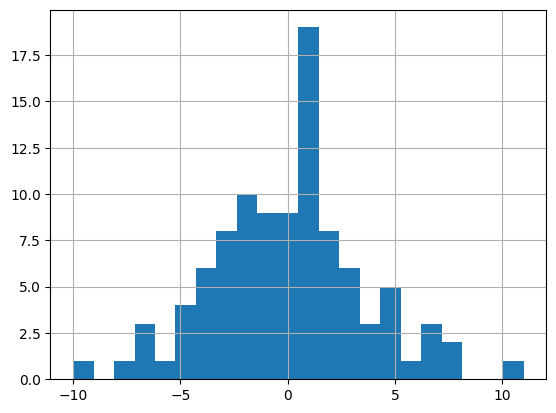

In [28]:
# view max score differential on chart
# distribution should be approx normal 
df_games['score_difference'].hist(bins=22)

In [29]:
# team 1 should win less than 50% of the time, 
# as teams are random and ties are not a victory
df_games['team1_victory'].value_counts(dropna=False)

0    52
1    48
Name: team1_victory, dtype: int64